In [34]:
import pandas as pd


In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

In [36]:
df = pd.read_excel("/content/review_preprocessing_withLenRev.xlsx")
df

,Unnamed: 0.1,Unnamed: 0,rewiew_ID,article,Date,Name,Rating,Rewiew,amount Photo,LenReview
0,0,0,y1a2e4cBpT2rITcGXb5U,123837570,13-04-2023 17:42:42,Владимир,3,начинать подтупливать сенсор становиться работ...,0,57
1,1,1,uLDLeocB5g4sVs4D8-56,123837570,13-04-2023 13:26:39,Алексей,5,норма лопата камера слабый место придираться ч...,3,86
2,2,2,rWodeocBYE-HFOZ5m9-H,123837570,13-04-2023 10:16:13,Дилбар,5,хороший телефон пользоваться 4 месяц,2,36
3,3,3,H2r7eYcBYE-HFOZ529Vf,123837570,13-04-2023 09:39:22,Александр,5,NaN,0,3
4,4,4,PALIdocBl47NwnZ1Tx-R,123837570,12-04-2023 18:44:12,Елена,5,продавец супер доставка очень быстрый хороший ...,0,93
...,...,...,...,...,...,...,...,...,...,...
8952,8952,8952,3pZCp4UBQBfka8TNcNCu,104288888,12-01-2023 18:33:47,Оксана,5,ноут приходить прекрасно упаковывать устанавли...,2,81
8953,8953,8953,WWBQVIUBxpMXtsmOF6MD,104288888,27-12-2022 16:00:13,Ефим Олегович,3,клевый ноут винд,0,16
8954,8954,8954,1bsAPoUBv9_TjX_mkPr5,104288888,23-12-2022 08:01:42,Екатерина,5,супер спасибо,0,13
8955,8955,8955,Y0W194QBMBFuPskoAlHI,104288888,09-12-2022 16:25:45,Никита,5,огонь коробка пломба запечатывать ноут менее ш...,0,52


In [37]:
df = df.dropna()
# Получение списка отзывов
rev = df['Rewiew'].tolist()

# Обработка текста и создание списка наиболее часто встречаемых слов
words = []
for review in rev:
    words.extend(review.split()) # токенизация

word_count = Counter(words)
most_common_words = [word for word, count in word_count.most_common(5)] # Отбор 5 наиболее часто встречаемых слов

In [38]:
print(most_common_words)

['телефон', 'работать', 'хороший', 'приходить', 'отличный']


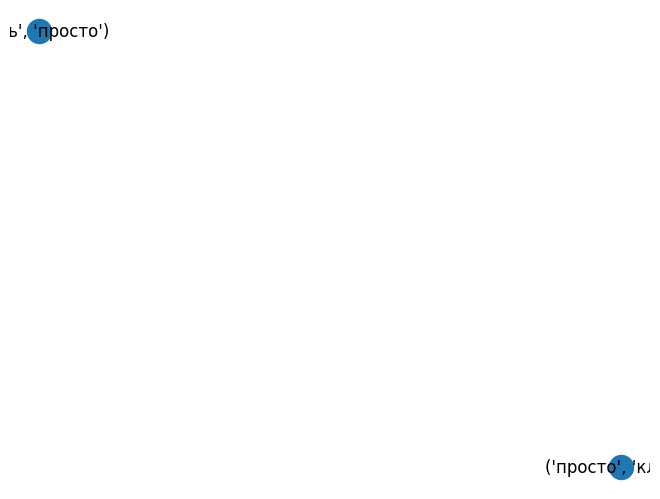

In [43]:

from nltk import bigrams

# Сбор биграмм для наиболее часто встречаемых слов
word_bigrams = []
for word in most_common_words:
    word_tokens = [token for token in word_tokenize(review.lower()) if token.isalpha()]
    word_bigrams.extend(list(bigrams(word_tokens)))

# Подсчет количества повторений каждой биграммы
bigram_counter = Counter(word_bigrams)
most_common_bigrams = [bigram for bigram, _ in bigram_counter.most_common(5)]

# Построение графа биграмм
G = nx.Graph()

# Создание узлов для биграмм
G.add_nodes_from(most_common_bigrams)

# Добавление ребер между биграммами и соответствующими им словами
for bigram in most_common_bigrams:
    first_word, second_word = bigram
    if first_word in most_common_words and second_word in most_common_words:
        G.add_edge(first_word, second_word)

# Визуализация графа
nx.draw(G, with_labels=True)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


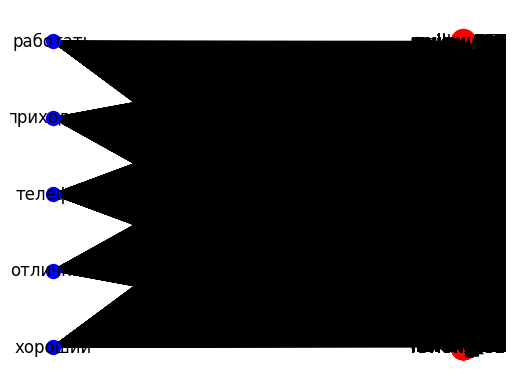

In [40]:
import nltk
nltk.download('punkt')

# Построение триграфа
Gg = nx.Graph()

# Создание узлов для слов
Gg.add_nodes_from(most_common_words, bipartite=0)

# Создание узлов для отзывов
reviews_nodes = []
for i, review in enumerate(rev):
    node_name = f"review_{i}"
    review_tokens = word_tokenize(review.lower())
    reviews_nodes.append(node_name)
    Gg.add_node(node_name, tokens=review_tokens, bipartite=1)

# Добавление ребер между словами и соответствующими им отзывами
for word in most_common_words:
    for node_name in reviews_nodes:
        review_tokens = Gg.nodes[node_name]['tokens']
        if word in review_tokens:
            Gg.add_edge(word, node_name)

# Раскладка графа и визуализация
pos = nx.bipartite_layout(Gg, most_common_words)
nx.draw_networkx_nodes(Gg, pos, node_color='blue', node_size=100)
nx.draw_networkx_nodes(Gg, pos, nodelist=reviews_nodes, node_color='red', node_size=300)
nx.draw_networkx_edges(Gg, pos)
nx.draw_networkx_labels(Gg, pos)
plt.axis('off')
plt.show()